In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.tools.plotting import scatter_matrix
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Downloaded the .csv file from the source, uploaded directly to PUIdata folder

nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA")+
                               "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

In [3]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [4]:
nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [5]:
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA")+"/Manhattan/MNMapPLUTO.shp")
#bsize shape file unzipped in another notebook, pulling from files in PUIdata/Manhattan

In [6]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

### Making a scatterplot of nrg

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4c56e33d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff4dc7c2390>]], dtype=object)

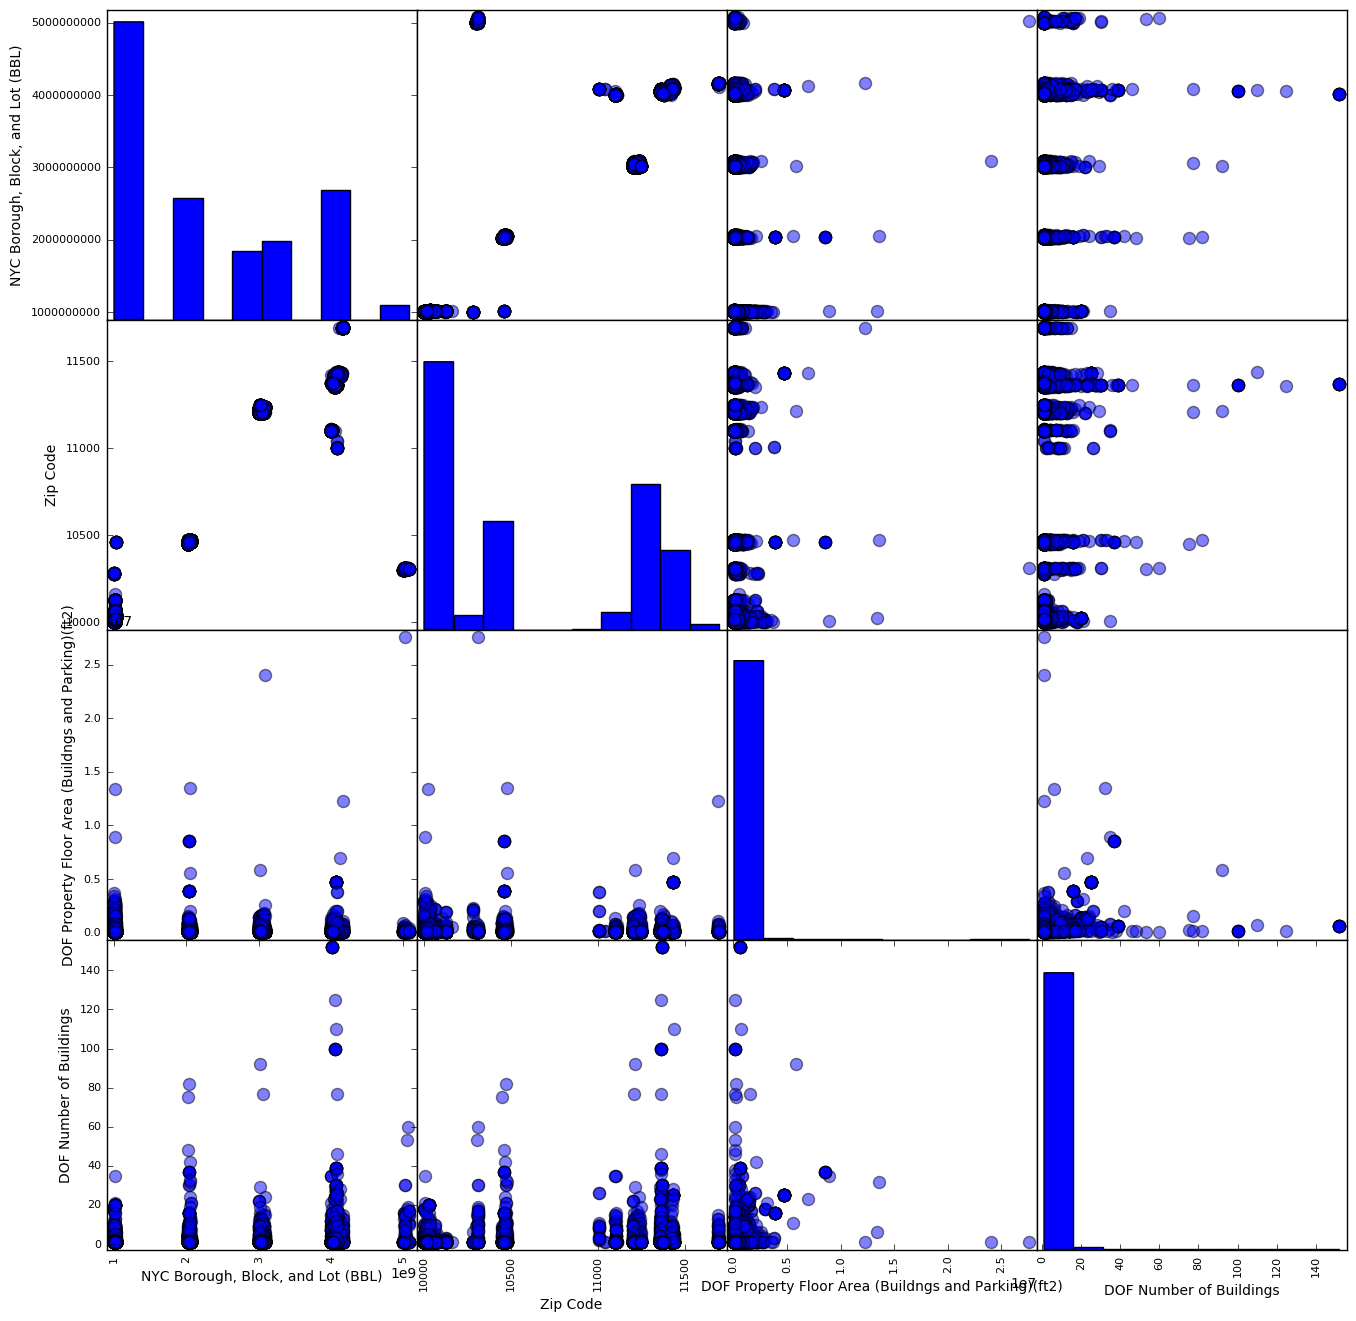

In [7]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

### Figure 1: A scatterplot of all numerical values in the nrg file

In [8]:
#using pd.to_numeric to change blanks in "Site EUI(kBtu/ft2)" column to NaN values
# setting errors="coerce" will change blanks to NaN
nrg["Site EUI(kBtu/ft2)"] = pd.to_numeric(nrg["Site EUI(kBtu/ft2)"], errors="coerce")
nrg["Reported Property Floor Area (Building(s)) (ft²)"] = pd.to_numeric(nrg["Reported Property Floor Area (Building(s)) (ft²)"], errors="coerce")

In [9]:
print (nrg['Site EUI(kBtu/ft2)'].astype(float)) #testing numeric change, successful

Record Number
12086      NaN
14354      NaN
12150      NaN
12590      NaN
15591      NaN
12135      NaN
8523       NaN
15920      NaN
14241      NaN
15925      NaN
9685       NaN
7540       NaN
14360      NaN
10588      NaN
14423      NaN
12515      NaN
3028     125.4
14609      NaN
12096      NaN
6666       NaN
8914       NaN
11586      NaN
11714      NaN
14307      NaN
12761      NaN
12091      NaN
16027      NaN
13378      NaN
14911      NaN
15103      NaN
         ...  
14559      NaN
14560      NaN
14748      NaN
14753      NaN
13582      NaN
13947      NaN
14777      NaN
14779      NaN
14409      NaN
13262      NaN
13261      NaN
12523      NaN
12529      NaN
12536      NaN
13929      NaN
13944      NaN
13945      NaN
13821      NaN
13829      NaN
13837      NaN
13838      NaN
13847      NaN
14352      NaN
12976      NaN
12978      NaN
12984      NaN
12987      NaN
12988      NaN
13472      NaN
13482      NaN
Name: Site EUI(kBtu/ft2), dtype: float64


In [10]:
print (nrg["Reported Property Floor Area (Building(s)) (ft²)"].astype(float)) 
#testing numeric change, successful

Record Number
12086    918919.0
14354         NaN
12150     64200.0
12590         NaN
15591     50000.0
12135     61800.0
8523     102198.0
15920     46620.0
14241         NaN
15925     54029.0
9685          0.0
7540     171502.0
14360         NaN
10588     68750.0
14423         NaN
12515         NaN
3028     330000.0
14609         NaN
12096     69160.0
6666      52974.0
8914      82200.0
11586     63360.0
11714     52960.0
14307         NaN
12761         NaN
12091    154754.0
16027    465667.0
13378         NaN
14911     68329.0
15103     66546.0
           ...   
14559         NaN
14560         NaN
14748         NaN
14753         NaN
13582         NaN
13947         NaN
14777         NaN
14779         NaN
14409         NaN
13262         NaN
13261         NaN
12523         NaN
12529         NaN
12536         NaN
13929         NaN
13944         NaN
13945         NaN
13821         NaN
13829         NaN
13837         NaN
13838         NaN
13847         NaN
14352         NaN
12976         

In [11]:
bsize.BBL.astype(float) #test for Pluto data

0        1.015450e+09
1        1.007238e+09
2        1.016800e+09
3        1.013850e+09
4        1.011970e+09
5        1.002360e+09
6        1.008370e+09
7        1.001960e+09
8        1.022240e+09
9        1.011270e+09
10       1.011650e+09
11       1.021740e+09
12       1.009120e+09
13       1.007920e+09
14       1.012110e+09
15       1.011240e+09
16       1.009040e+09
17       1.010090e+09
18       1.020620e+09
19       1.020630e+09
20       1.008940e+09
21       1.005728e+09
22       1.004400e+09
23       1.019470e+09
24       1.008830e+09
25       1.020810e+09
26       1.021610e+09
27       1.008570e+09
28       1.008830e+09
29       1.020410e+09
             ...     
42667    1.014738e+09
42668    1.006208e+09
42669    1.007218e+09
42670    1.013428e+09
42671    1.019448e+09
42672    1.017298e+09
42673    1.018488e+09
42674    1.005008e+09
42675    1.020448e+09
42676    1.004518e+09
42677    1.020958e+09
42678    1.007688e+09
42679    1.008498e+09
42680    1.017298e+09
42681    1

In [12]:
#renaming column in nrg dataframe to facilitate merge with bsize dataframe

nrg.rename(columns={"NYC Borough, Block, and Lot (BBL)": "BBL"}, inplace=True)

In [13]:
nrg.drop(nrg.columns[[1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,21,22,23]], axis=1, inplace=True)
nrg.columns
#drop unneeded columns from df 'nrg'

Index([u'BBL', u'Site EUI(kBtu/ft2)',
       u'Reported Property Floor Area (Building(s)) (ft²)'],
      dtype='object')

In [14]:
cleanupbsize = bsize[[u'BBL',u'UnitsRes', u'UnitsTotal', u'ZoneMap', u'geometry']]
cleanupbsize.columns
#drop excess columns from bsize, as cleanupbsize

Index([u'BBL', u'UnitsRes', u'UnitsTotal', u'ZoneMap', u'geometry'], dtype='object')

In [15]:
# merging data 

bblnrgdata = pd.merge(nrg, cleanupbsize, on=["BBL"])

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:2097: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:1237: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


In [16]:
bblnrgdata.head() #test merge, successful

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,ZoneMap,geometry
0,1.006700e+09,NaN,NaN,0,1,8b,"POLYGON ((982544.9469999969 212642.9668000042,..."
1,1.004370e+09,NaN,NaN,0,4,12c,"POLYGON ((988632.9397999942 204610.9329999983,..."
2,1.013110e+09,125.4,330000.0,0,56,8c,"POLYGON ((993141.1744000018 216172.3948000073,..."
3,1.009220e+09,NaN,NaN,148,148,12c,"POLYGON ((989369.5851999968 206338.7575999945,..."
4,1.007400e+09,NaN,68329.0,0,1,8b,"POLYGON ((983418.6007999927 209632.8701999933,..."


UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 46: ordinal not in range(128)

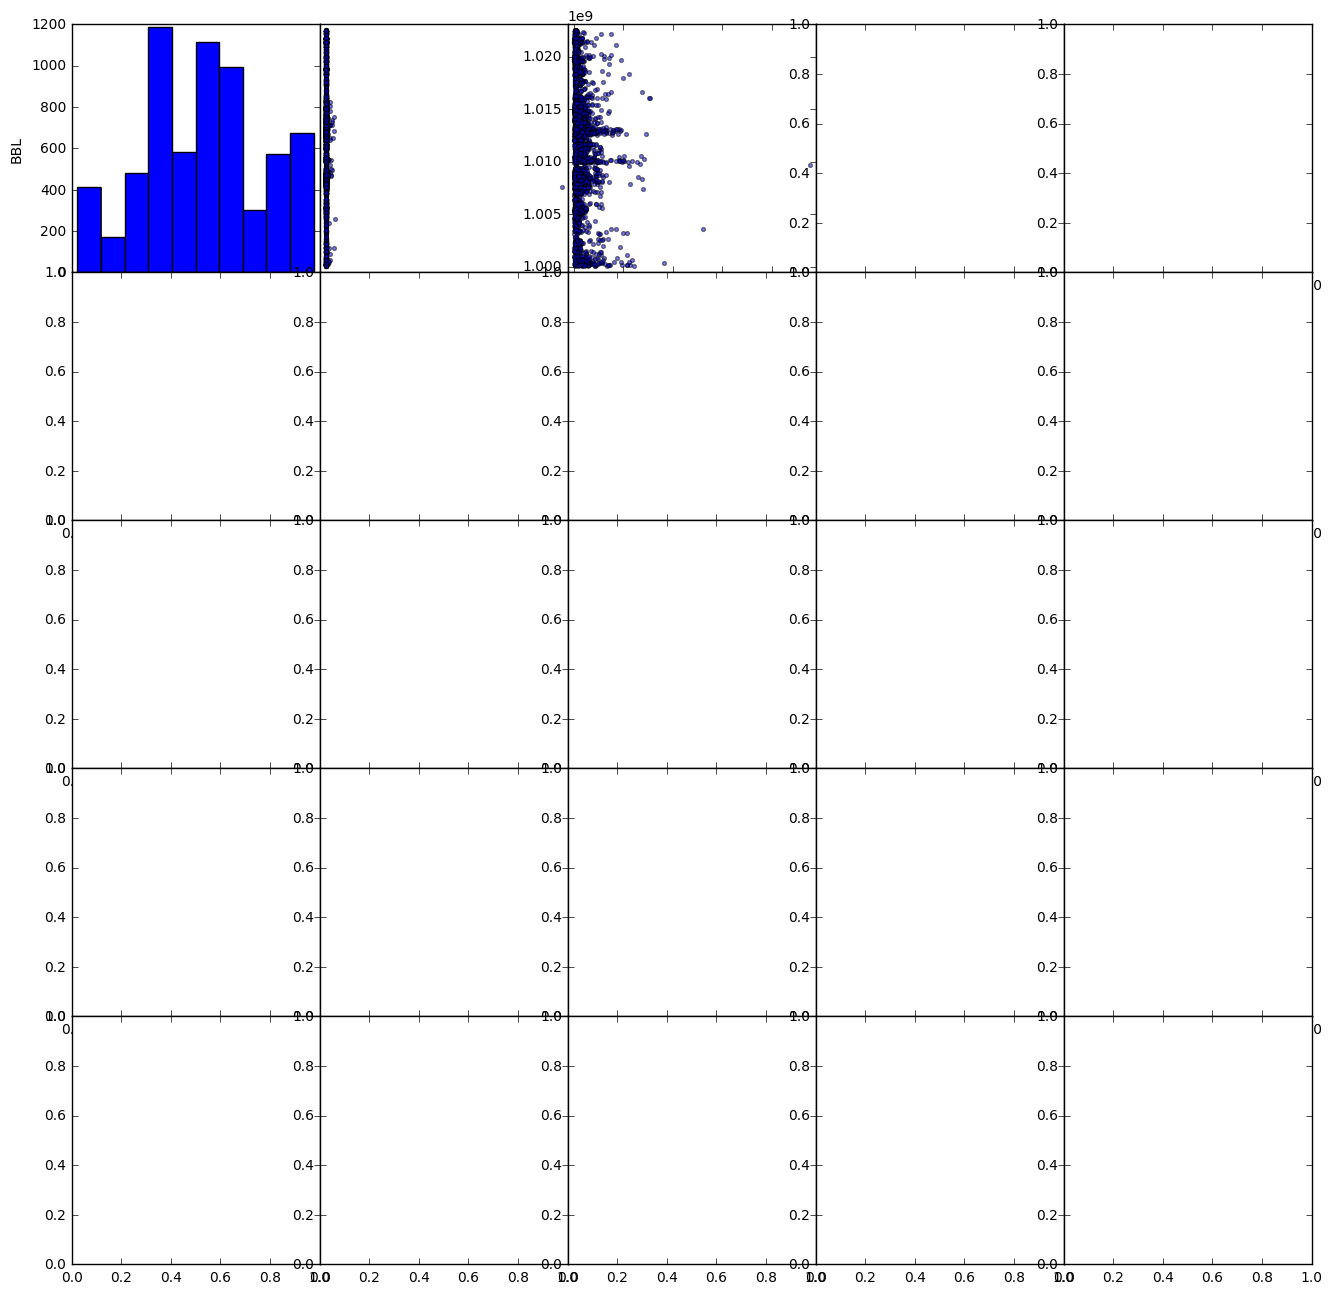

In [17]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

### Figure 2 
##### Above is a test scattermatrix. The plot is unuseful because we have not yet calculated the Total Energy Usage

In [18]:
# we want to plot total ENERGY use for number of units, must calculate the total ENERGY by 
# multiplying the total sq footage by the energy by sq foot
#plot the result against the number of units
#renaming for simplicity 'Sqenergy' and 'Sqarea'

bblnrgdata.rename(columns={"Site EUI(kBtu/ft2)":"Sqenergy"
                           ,"Reported Property Floor Area (Building(s)) (ft²)":"Sqarea"}, inplace=True)

In [19]:
# Using list comprehension to calculare Total_Energy_Usage
bblnrgdata["Total_Energy_Usage"] = bblnrgdata.apply(lambda x : float(x.Sqenergy) * float(x.Sqarea), axis=1)

In [20]:
bblnrgdata.head()

,BBL,Sqenergy,Sqarea,UnitsRes,UnitsTotal,ZoneMap,geometry,Total_Energy_Usage
0,1.006700e+09,NaN,NaN,0,1,8b,"POLYGON ((982544.9469999969 212642.9668000042,...",NaN
1,1.004370e+09,NaN,NaN,0,4,12c,"POLYGON ((988632.9397999942 204610.9329999983,...",NaN
2,1.013110e+09,125.4,330000.0,0,56,8c,"POLYGON ((993141.1744000018 216172.3948000073,...",41382000.0
3,1.009220e+09,NaN,NaN,148,148,12c,"POLYGON ((989369.5851999968 206338.7575999945,...",NaN
4,1.007400e+09,NaN,68329.0,0,1,8b,"POLYGON ((983418.6007999927 209632.8701999933,...",NaN


In [21]:
#removing rows with null values in the Total_Energy_Usage column
bblnrgdata = bblnrgdata[~bblnrgdata.Total_Energy_Usage.isnull()]

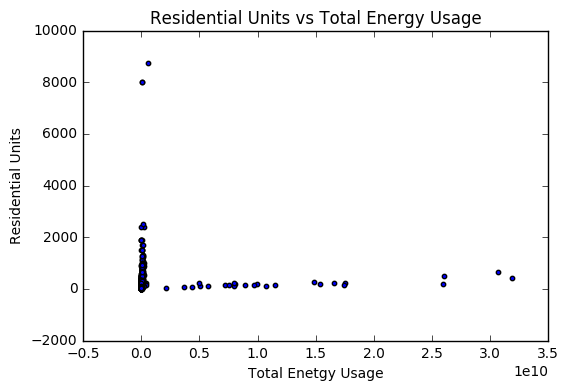

In [147]:
ax = bblnrgdata.plot.scatter(y="UnitsRes", x="Total_Energy_Usage", s=10)
ax.set_xlabel("Total Enetgy Usage")
ax.set_ylabel("Residential Units")
ax.set_title("Residential Units vs Total Energy Usage")
pl.show()

### Figure 3: Residential Units vs Total Energy Usage
Due to no axis limits, this pot is unuseful. I will re-plot the same data below with limits

In [22]:
bblnrgdata = bblnrgdata[(bblnrgdata.Total_Energy_Usage > 1000) & (bblnrgdata["UnitsRes"] > 10)]

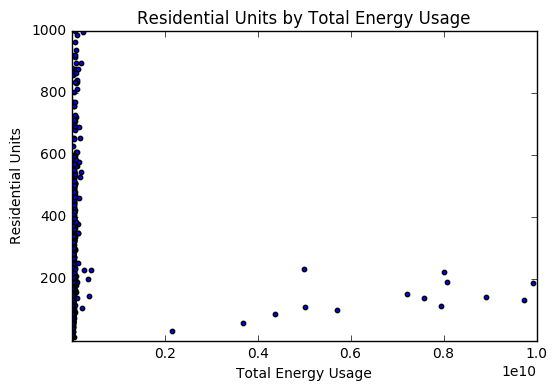

In [146]:
ax = bblnrgdata.plot.scatter(y="UnitsRes", x="Total_Energy_Usage", s=10)
ax.set_ylim(1,1000)
ax.set_xlim(1000,1e10)
ax.set_xlabel("Total Energy Usage")
ax.set_ylabel("Residential Units")
ax.set_title("Residential Units by Total Energy Usage")
pl.show()

###  Figure 4: Residential Units by Total Energy Usage
##### The above scatter plot figure demonstrates Residential Units by Total Energy Usage

# Log Plot

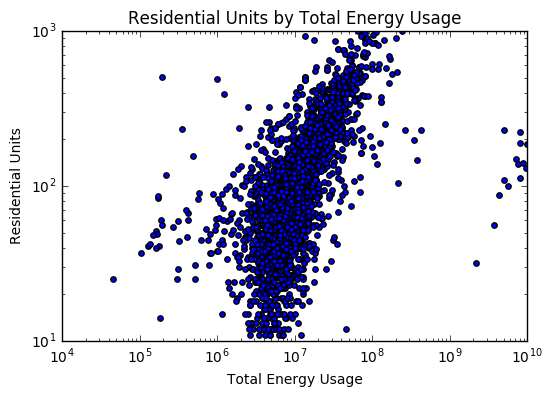

In [48]:
ax = bblnrgdata.plot.scatter(y="UnitsRes", x="Total_Energy_Usage", s=15, loglog=True)
ax.set_ylim(10,1000)
ax.set_xlim(1e4,1e10)
ax.set_xlabel("Total Energy Usage")
ax.set_ylabel("Residential Units")
ax.set_title("Residential Units by Total Energy Usage")
pl.show()

### Figure 5: Log plot of Residential Units by Total Energy Usage

# Total Energy Usage vs Residential Units

In [51]:
# Adding the fit line, using code from skeleton notebook 
X = sm.add_constant(np.log10(bblnrgdata.UnitsRes))
model = sm.OLS(np.log10(bblnrgdata.Total_Energy_Usage), X, missing='drop') 
fit_1 = model.fit()
Y = fit_1.predict()
y = np.log10(bblnrgdata.Total_Energy_Usage)
sigma = y/2 
chisq = ((y - Y)**2 / sigma**2).sum()

print ("Chi-Sqaure Result {}".format(chisq))


Chi-Sqaure Result 38.1108105813


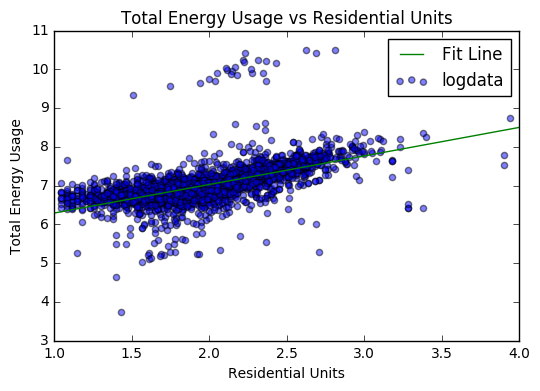

In [144]:
pl.scatter(log10(bblnrgdata.UnitsRes), log10(bblnrgdata.Total_Energy_Usage), alpha=0.5, label="logdata")
x_line = np.linspace(1,4,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, fit_1.predict(x_fit), 'g-', label="Fit Line")
pl.plot()
pl.ylabel("Total Energy Usage")
pl.xlabel("Residential Units")
pl.title("Total Energy Usage vs Residential Units")
plt.xlim([1,4])
pl.legend(loc="best")
pl.show()

### Figure 6: Total Energy Usage vs Residential Units
##### The above plot shows Total Energy by Res Unit with a fit line model

In [54]:
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Energy_Usage   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1887.
Date:                Tue, 18 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:34:20   Log-Likelihood:                -1522.2
No. Observations:                3461   AIC:                             3048.
Df Residuals:                    3459   BIC:                             3061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.5525      0.034    163.619      0.000         5.486     5.619
UnitsRes       0.7367      0.017     43.443      0.000         0.703     0.770
==============================================================================
Omnibus:                     2110.786   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96633.357
Skew:                           2.246   Prob(JB):                         0.00
Kurtosis:                      28.494   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residential Units VS Total Energy Usage

In [132]:
X = sm.add_constant(np.log10(bblnrgdata.Total_Energy_Usage))
model = sm.OLS(np.log10(bblnrgdata.UnitsRes), X, missing='drop') 
fit_2 = model.fit()
Y = fit_2.predict()
y = np.log10(bblnrgdata.UnitsRes)
sigma = y/2
chisq = ((y - Y)**2 / sigma**2).sum()

print ("Chi-Sqaure Result {}".format(chisq))

Chi-Sqaure Result 420.665629853


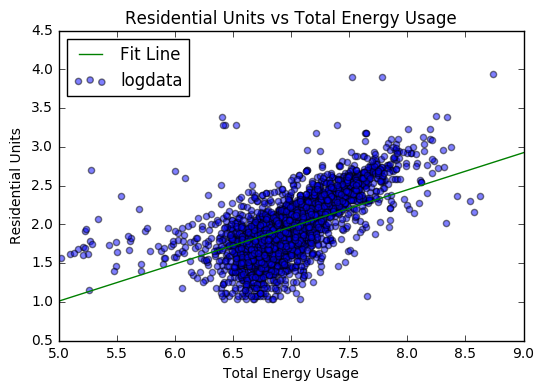

In [143]:
pl.scatter(log10(bblnrgdata.Total_Energy_Usage), log10(bblnrgdata.UnitsRes), alpha=0.5, label="logdata")
x_line = np.linspace(5,9,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, fit_2.predict(x_fit), 'g-', label="Fit Line")
pl.plot()
pl.ylabel("Residential Units")
pl.xlabel("Total Energy Usage")
pl.title("Residential Units vs Total Energy Usage")
pl.legend(loc="upper left")
plt.xlim(5,9)
pl.show()

### Figure 7: Residential Units vs Total Energy Usage
##### The above plot shows Res Units by Total Energy with a Fit Line

In [58]:
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UnitsRes   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1887.
Date:                Tue, 18 Oct 2016   Prob (F-statistic):               0.00
Time:                        19:38:13   Log-Likelihood:                -777.79
No. Observations:                3461   AIC:                             1560.
Df Residuals:                    3459   BIC:                             1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 -1.3890      0.077    -17.949      0.000        -1.541    -1.237
Total_Energy_Usage     0.4792      0.011     43.443      0.000         0.458     0.501
==============================================================================
Omnibus:                      280.358   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.588
Skew:                          -0.173   Prob(JB):                         0.00
Kurtosis:                       6.184   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#Creating new dataframe for the 2nd degree polynomial fit line
degree_2 = bblnrgdata[["UnitsRes","Total_Energy_Usage"]]
degree_2 = degree_2.applymap(np.log10)

In [122]:
degree_2.head()

,UnitsRes,Total_Energy_Usage
19,1.732394,6.950549
20,1.875061,6.811909
21,2.107210,6.860458
23,1.748188,6.919769
24,2.685742,10.415995


In [123]:
#Creating the column for the 2nd degree polynomial
degree_2["Degree2"] = degree_2.UnitsRes**2

In [124]:
degree_2.head()

,UnitsRes,Total_Energy_Usage,Degree2
19,1.732394,6.950549,3.001188
20,1.875061,6.811909,3.515855
21,2.107210,6.860458,4.440334
23,1.748188,6.919769,3.056161
24,2.685742,10.415995,7.213209


In [133]:
Test_2 = smf.ols(formula = 'Total_Energy_Usage ~ Degree2 + UnitsRes', data=degree_2).fit()
Test_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Energy_Usage   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     971.1
Date:                Wed, 19 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:23:41   Log-Likelihood:                -1504.3
No. Observations:                3461   AIC:                             3015.
Df Residuals:                    3458   BIC:                             3033.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.2299      0.118     52.823      0.000         5.999     6.461
Degree2        0.1669      0.028      5.995      0.000         0.112     0.222
UnitsRes       0.0519      0.115      0.450      0.653        -0.174     0.278
==============================================================================
Omnibus:                     2111.535   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106260.647
Skew:                           2.217   Prob(JB):                         0.00
Kurtosis:                      29.781   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

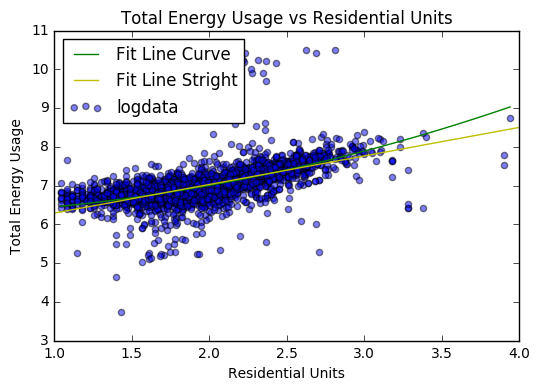

In [140]:
pl.scatter(log10(bblnrgdata.UnitsRes), log10(bblnrgdata.Total_Energy_Usage), alpha=0.5, label="logdata")
dfnew = pd.DataFrame()
dfnew['UnitsRes'] = np.arange(log10(bblnrgdata.UnitsRes).min(), log10(bblnrgdata.UnitsRes).max(), 0.1)
dfnew['Degree2'] = dfnew['UnitsRes'] * dfnew['UnitsRes']
pl.plot(dfnew['UnitsRes'], fres.predict(dfnew), 'g-', label="Fit Line Curve")
pl.plot()
x_line = np.linspace(1,4,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, fit_1.predict(x_fit), 'y-', label="Fit Line Stright")
pl.ylabel("Total Energy Usage")
pl.xlabel("Residential Units")
pl.title("Total Energy Usage vs Residential Units")
plt.xlim([1,4])
pl.legend(loc="best")
pl.show()

### Figure 8: Total Energy Usage vs Residential Units
##### With Fit Line (model 1) and Parabola (model 2)

In [141]:
#Likelihood Ratio (LR) = -2 * (Log-Likelihood_Model1 - Log-Likelihood_Model2)
#Log-Likelihood_Model1 = -1522.2
#Log-Likelihood_Model1 = -1504.3

LR = -2*((-1522.2) - (-1504.3))
LR

35.80000000000018


### The null hypotesis states that the Linear Fit (model 1) is a better fit than the 2nd Dregree Polynomial fit (model 2). Degrees of freedom (dof) is equal to 1 and according to the table provided, the critical value is 3.84. As the Likelihood Ratio (35.8) is much larger than the critical value (3.84)  we can reject the null hypothesis. 

In [142]:
smf.ols(formula = 'Total_Energy_Usage ~ Degree2 + UnitsRes', 
        data=degree_2).fit().compare_lr_test(smf.ols(formula = 'Total_Energy_Usage ~  UnitsRes', 
        data=degree_2).fit())

(35.782882335342038, 2.2057743562761581e-09, 1.0)